In [1]:
import os
import zipfile
# import random
# import shutil
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from shutil import copyfile
# import matplotlib.pyplot as plt
# import psutil
# import time

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
train_data_path = "train"
validation_data_path = "valid"
test_data_path = "test"

In [3]:
img_width, img_height = 150, 150
# channel = (3, )
input_shape = (img_width, img_height)
# input_shape = tf.expand_dims(input_shape , -1)
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    # fill_mode='nearest'

)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    # fill_mode='nearest'

)

test_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  #   fill_mode='nearest'

                                  )

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode="categorical",
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 260915 images belonging to 14 classes.
Found 47531 images belonging to 14 classes.
Found 137375 images belonging to 14 classes.


In [6]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    print(num_class)
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, input_shape[0], input_shape[1]],
                       [None, num_class])
    )
    return tf_generator


train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(validation_generator, input_shape)

14
14
14


In [7]:
def create_model(img_width, img_height, num_classes):
    
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation="relu",
               input_shape=(img_height, img_width, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(14, activation='softmax')
    ])

    return model


model = create_model(img_width, img_height, 14)

In [8]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "categorical_crossentropy"],
)

In [9]:
model_viz = tf.keras.utils.plot_model(model,
                                      to_file='model.png',
                                      show_shapes=True,
                                      show_layer_names=True,
                                      rankdir='TB',
                                      expand_nested=True,
                                      dpi=55)
model_viz

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

history1 = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(
        validation_generator) // validation_generator.batch_size,
    callbacks=[early_stopping],
)

Epoch 1/20
254/254 [==============================] - 152s 595ms/step - loss: 2.7842 - accuracy: 0.1617 - categorical_crossentropy: 2.7842 - val_loss: 2.4115 - val_accuracy: 0.2092 - val_categorical_crossentropy: 2.4115
Epoch 2/20
254/254 [==============================] - 129s 507ms/step - loss: 2.4256 - accuracy: 0.1966 - categorical_crossentropy: 2.4256 - val_loss: 2.4243 - val_accuracy: 0.1787 - val_categorical_crossentropy: 2.4243
Epoch 3/20
254/254 [==============================] - 124s 489ms/step - loss: 2.3984 - accuracy: 0.2050 - categorical_crossentropy: 2.3984 - val_loss: 2.4131 - val_accuracy: 0.2024 - val_categorical_crossentropy: 2.4131
Epoch 4/20
254/254 [==============================] - 124s 489ms/step - loss: 2.3833 - accuracy: 0.2130 - categorical_crossentropy: 2.3833 - val_loss: 2.3662 - val_accuracy: 0.2255 - val_categorical_crossentropy: 2.3662
Epoch 5/20
254/254 [==============================] - 124s 489ms/step - loss: 2.3570 - accuracy: 0.2221 - categorical_cr

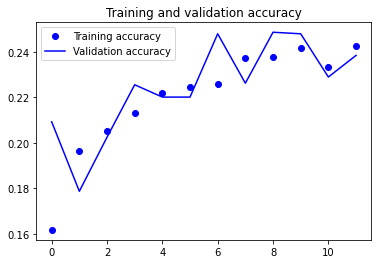

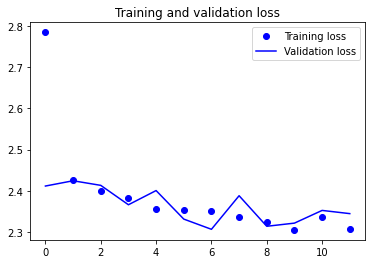

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()